# Neuralna mreza sa jednim hidden layer-om

---



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


def clean_data(data):
    # dropujemo passenger_id, name, ticket cabin
    X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    y = data['Survived']

    # Convert categorical features to numerical values
    X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # zameni na sa srednjom vrednoscu
    X['Age'].fillna(X['Age'].median(), inplace=True)
    # gde ima missing embarked samo zameni sa najcescom vrednoscu
    X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
    X['Fare'].fillna(X['Fare'].median(), inplace=True)

    # normalizacija
    X = (X - X.mean()) / X.std()

    return X, y

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

X_train, y_train = clean_data(data_train)
X_test, y_test = clean_data(data_test)

input_size = X_train.shape[1]
#broj neurona u hidden layeru
hidden_size = 16
#jedan neuron za output
output_size = 1


# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
  e_x = np.exp(x-np.max(x))
  return e_x / np.sum(e_x, axis=1, keepdims=True)


learning_rate = 0.001
num_epochs = 500

# Convert the data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

# weights za svaki neuron je (7) a ima 16 neurona na kojih se vezuju tih 7 weights-a
# bias inicijalizujemo sa 0
W1 = tf.Variable(tf.random.normal([input_size, hidden_size]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([hidden_size]), dtype=tf.float32)
W2 = tf.Variable(tf.random.normal([hidden_size, output_size]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([output_size]), dtype=tf.float32)

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

batch_size = 128
num_batches = int(np.ceil(len(X_train) / batch_size))

for epoch in range(num_epochs):
  epoch_loss=0
  for batch in range(num_batches):
    start_index = batch * batch_size
    end_index = (batch + 1) * batch_size

    X_batch = X_train_tf[start_index:end_index]
    y_batch = y_train_tf[start_index:end_index]

    with tf.GradientTape() as tape:

        #layeri i aktivaciona
        hidden_layer = tf.nn.relu(tf.add(tf.matmul(X_batch, W1), b1))
        output_layer = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer, W2), b2))

        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_batch, logits=output_layer))

    # gradient
    gradients = tape.gradient(loss, [W1, b1, W2, b2])


    #optimizator
    opt.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    epoch_loss += loss

  epoch_loss /= len(X_train)
  print(f'Epoch: {epoch+1}/{num_epochs}| Avg loss: {epoch_loss:.5f}')

#predikcija
hidden_layer = relu(np.dot(X_test, W1) + b1)
predictions = sigmoid(np.dot(hidden_layer, W2) + b2)
predictions = np.round(predictions).flatten()


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.scatter(range(len(predictions)), predictions, c=y_test, cmap='bwr', alpha=0.7)
plt.xlabel('Passenger Index')
plt.ylabel('Predicted Class')
plt.title('Classification Results')
plt.colorbar(label='Actual Class')
plt.show()

<ipython-input-50-dd02da0d07db>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-50-dd02da0d07db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
<ipython-input-50-dd02da0d07db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Epoch: 1/500| Avg loss: 0.00624
Epoch: 2/500| Avg loss: 0.00620
Epoch: 3/500| Avg loss: 0.00616
Epoch: 4/500| Avg loss: 0.00612
Epoch: 5/500| Avg loss: 0.00608
Epoch: 6/500| Avg loss: 0.00604
Epoch: 7/500| Avg loss: 0.00600
Epoch: 8/500| Avg loss: 0.00597
Epoch: 9/500| Avg loss: 0.00594
Epoch: 10/500| Avg loss: 0.00590
Epoch: 11/500| Avg loss: 0.00588
Epoch: 12/500| Avg loss: 0.00585
Epoch: 13/500| Avg loss: 0.00582
Epoch: 14/500| Avg loss: 0.00579
Epoch: 15/500| Avg loss: 0.00577
Epoch: 16/500| Avg loss: 0.00575
Epoch: 17/500| Avg loss: 0.00572
Epoch: 18/500| Avg loss: 0.00570
Epoch: 19/500| Avg loss: 0.00568
Epoch: 20/500| Avg loss: 0.00566
Epoch: 21/500| Avg loss: 0.00565
Epoch: 22/500| Avg loss: 0.00563
Epoch: 23/500| Avg loss: 0.00561
Epoch: 24/500| Avg loss: 0.00559
Epoch: 25/500| Avg loss: 0.00558
Epoch: 26/500| Avg loss: 0.00556
Epoch: 27/500| Avg loss: 0.00555
Epoch: 28/500| Avg loss: 0.00554
Epoch: 29/500| Avg loss: 0.00552
Epoch: 30/500| Avg loss: 0.00551
Epoch: 31/500| Avg 

# Neuralna mreza sa 2 hidden layer-a

<ipython-input-58-a955e5ff519b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-58-a955e5ff519b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
<ipython-input-58-a955e5ff519b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Epoch: 1/500| Avg loss: 0.00520
Epoch: 2/500| Avg loss: 0.00519
Epoch: 3/500| Avg loss: 0.00518
Epoch: 4/500| Avg loss: 0.00517
Epoch: 5/500| Avg loss: 0.00517
Epoch: 6/500| Avg loss: 0.00515
Epoch: 7/500| Avg loss: 0.00512
Epoch: 8/500| Avg loss: 0.00510
Epoch: 9/500| Avg loss: 0.00509
Epoch: 10/500| Avg loss: 0.00507
Epoch: 11/500| Avg loss: 0.00503
Epoch: 12/500| Avg loss: 0.00499
Epoch: 13/500| Avg loss: 0.00499
Epoch: 14/500| Avg loss: 0.00499
Epoch: 15/500| Avg loss: 0.00498
Epoch: 16/500| Avg loss: 0.00498
Epoch: 17/500| Avg loss: 0.00497
Epoch: 18/500| Avg loss: 0.00497
Epoch: 19/500| Avg loss: 0.00497
Epoch: 20/500| Avg loss: 0.00497
Epoch: 21/500| Avg loss: 0.00496
Epoch: 22/500| Avg loss: 0.00496
Epoch: 23/500| Avg loss: 0.00496
Epoch: 24/500| Avg loss: 0.00496
Epoch: 25/500| Avg loss: 0.00496
Epoch: 26/500| Avg loss: 0.00496
Epoch: 27/500| Avg loss: 0.00496
Epoch: 28/500| Avg loss: 0.00496
Epoch: 29/500| Avg loss: 0.00495
Epoch: 30/500| Avg loss: 0.00495
Epoch: 31/500| Avg 

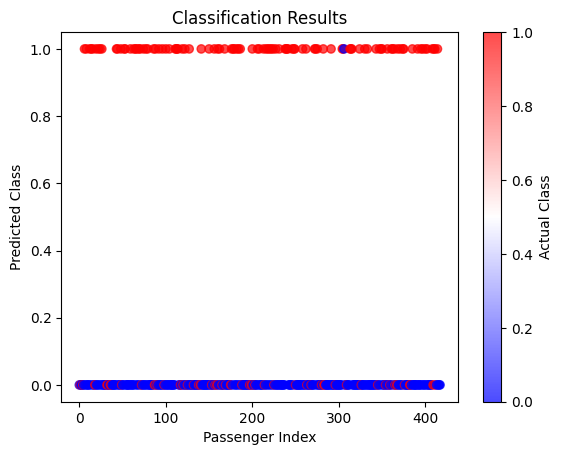

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


def clean_data(data):
    # dropujemo passenger_id, name, ticket cabin
    X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Embarked']]
    y = data['Survived']

    # kastujemo kategoricke vrednosti u numericke
    X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


    # zameni na sa srednjom vrednoscu
    X['Age'].fillna(X['Age'].median(), inplace=True)
    # gde ima missing embarked samo zameni sa najcescom vrednoscu
    X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
    #X['Fare'].fillna(X['Fare'].median(), inplace=True)

    # normalizacija
    X = (X - X.mean()) / X.std()

    return X, y

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

X_train, y_train = clean_data(data_train)
X_test, y_test = clean_data(data_test)

#velicina (br neurona) input layer-a je koliko feature-a imamo (7)
input_size = X_train.shape[1]
#broj neurona u hidden layeru
hidden_size1 = 32
hidden_size2 = 32
#jedan neuron za output
output_size = 1


learning_rate = 0.001
num_epochs = 500

#trening test
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

X_test_tf = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values.reshape(-1, 1), dtype=tf.float32)


# weights
# bias inicijalizujemo sa 0
W1 = tf.Variable(tf.random.normal([input_size, hidden_size1]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([hidden_size1]), dtype=tf.float32)

W2 = tf.Variable(tf.random.normal([hidden_size1, hidden_size2]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([hidden_size2]), dtype=tf.float32)

W3 = tf.Variable(tf.random.normal([hidden_size2, output_size]), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([output_size]), dtype=tf.float32)


opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

batch_size = 128
num_batches = int(np.ceil(len(X_train) / batch_size))

for epoch in range(num_epochs):
  epoch_loss=0
  for batch in range(num_batches):
    start_index = batch * batch_size
    end_index = (batch + 1) * batch_size

    X_batch = X_train_tf[start_index:end_index]
    y_batch = y_train_tf[start_index:end_index]

    with tf.GradientTape() as tape:
        #layeri i aktivaciona
        hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(X_batch, W1), b1))
        hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, W2), b2))
        output_layer = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer2, W3), b3))

        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_batch, logits=output_layer))

    # gradient
    gradients = tape.gradient(loss, [W1, b1, W2, b2])

    #optimizator
    opt.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    epoch_loss += loss

  epoch_loss /= len(X_train)
  print(f'Epoch: {epoch+1}/{num_epochs}| Avg loss: {epoch_loss:.5f}')

def relu(x):
    return np.maximum(0, x)

#predikcija
hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(X_test_tf, W1),b1))
hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, W2),b2))
predictions = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer2, W3), b3))

predictions = np.round(predictions).flatten()

#tacnost
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.scatter(range(len(predictions)), predictions, c=y_test, cmap='bwr', alpha=0.7)
plt.xlabel('Passenger Index')
plt.ylabel('Predicted Class')
plt.title('Classification Results')
plt.colorbar(label='Actual Class')
plt.show()